In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# Constants for the new model
# Constants for the new model
E_max = 100  # Maximum effectiveness (e.g., 100%)
K_m = 50     # Dose at half-maximal effectiveness
n = 2        # Hill coefficient
T = 400     # Toxicity scaling factor
A = 6     # Amplitude of oscillations
P = 40       # Period of oscillations



# Effectiveness function with oscillations
def effectiveness(D):
    """Effectiveness as a function of dose, with toxicity and oscillations."""
    hill_term = (E_max * D**n) / (K_m**n + D**n)
    toxicity_term = D**2 / T
    oscillation_term = A * np.sin(2 * np.pi * D / P)
    return hill_term - toxicity_term + oscillation_term

In [2]:
def loss_function(D):
    """Loss function to minimize (negative effectiveness)."""
    return -effectiveness(D)


def loss_function_gradient(D):
    """Gradient of the loss function w.r.t dose."""
    hill_grad = (n * E_max * K_m**n * D**(n-1)) / (K_m**n + D**n)**2
    toxicity_grad = 2 * D / T
    oscillation_grad = (A * 2 * np.pi / P) * np.cos(2 * np.pi * D / P)
    return -(hill_grad - toxicity_grad + oscillation_grad)



all_Ds = np.linspace(0,250,600)
all_Es = [effectiveness(D) for D in all_Ds]
all_Ls = [loss_function(D) for D in all_Ds]

In [3]:

def plot_results(all_Ds,all_Es,all_Ls,epochs,momentum_coefficients,d_history,optimal_Ds,D,title):

    if optimal_Ds is not None:
        plt.figure(figsize=(12,5),dpi=300)
        plt.plot(all_Ds,all_Ls,label="Loss Function (L(D))", color="red")
        plt.scatter(d_history[:epochs], [loss_function(D) for D in d_history[:epochs]], color="slategrey",s=160,alpha=0.6, label=f"Optimization Path for momentum coefficent {momentum_coefficients[0]}")
        plt.scatter(d_history[epochs:epochs*2], [loss_function(D) for D in d_history[epochs:epochs*2]],s=80,alpha=0.8, color="deepskyblue", label=f"Optimization Path for momentum coefficent {momentum_coefficients[1]}")
        plt.scatter(d_history[epochs*2:], [loss_function(D) for D in d_history[epochs*2:]], color="blue",s=20,alpha=1, label=f"Optimization Path for momentum coefficent {momentum_coefficients[2]}")


        plt.axvline(optimal_Ds[0], color="slategrey", linestyle="-", label=f"Optimal Dose found by momentum {momentum_coefficients[0]}: {optimal_Ds[0]:.2f}")
        plt.axvline(optimal_Ds[1], color="deepskyblue", linestyle=":", label=f"Optimal Dose found by momentum {momentum_coefficients[1]}: {optimal_Ds[1]:.2f}")
        plt.axvline(optimal_Ds[2], color="blue", linestyle=":", label=f"Optimal Dose found by momentum {momentum_coefficients[2]}: {optimal_Ds[2]:.2f}")


        plt.xlabel("Dose (D)")
        plt.ylabel("Loss")
        plt.title(f'Loss function vs Dose - {title}')
        plt.legend()
        plt.show()


        plt.figure(figsize=(12,5),dpi=300)
        plt.plot(all_Ds,all_Es,label="Drug Effectiveness function", color="cornflowerblue")
        
        plt.axvline(optimal_Ds[0], color="slategrey", linestyle="-", label=f"Optimal Dose found by momentum {momentum_coefficients[0]}: {optimal_Ds[0]:.2f}")
        plt.axvline(optimal_Ds[1], color="deepskyblue", linestyle=":", label=f"Optimal Dose found by momentum {momentum_coefficients[1]}: {optimal_Ds[1]:.2f}")
        plt.axvline(optimal_Ds[2], color="blue", linestyle=":", label=f"Optimal Dose found by momentum {momentum_coefficients[2]}: {optimal_Ds[2]:.2f}")

        plt.xlabel("Dose (D)")
        plt.ylabel("Drug Effectiveness")
        plt.title(f'Drug Effectiveness vs Dose - {title}')
        plt.legend()
        plt.show()


    else:
        plt.figure(figsize=(12,5),dpi=300)
        plt.plot(all_Ds,all_Ls,label="Loss Function (L(D))", color="red")
        plt.scatter(d_history, [loss_function(D) for D in d_history], color="blue", label="Optimization Path")
        plt.axvline(D, color="blue", linestyle="--", label=f"Optimal Dose found: {D:.2f}")
        plt.xlabel("Dose (D)")
        plt.ylabel("Loss")
        plt.title(f'Loss function vs Dose - {title}')
        plt.legend()
        plt.show()

        plt.figure(figsize=(12,5),dpi=300)
        plt.plot(all_Ds,all_Es,label="Drug Effectiveness function", color="cornflowerblue")
        
        plt.axvline(D, color="blue", linestyle="-", label=f"Optimal Dose found: {D:.2f}")


        plt.xlabel("Dose (D)")
        plt.ylabel("Drug Effectiveness")
        plt.title(f'Drug Effectiveness vs Dose - {title}')
        plt.legend()
        plt.show()

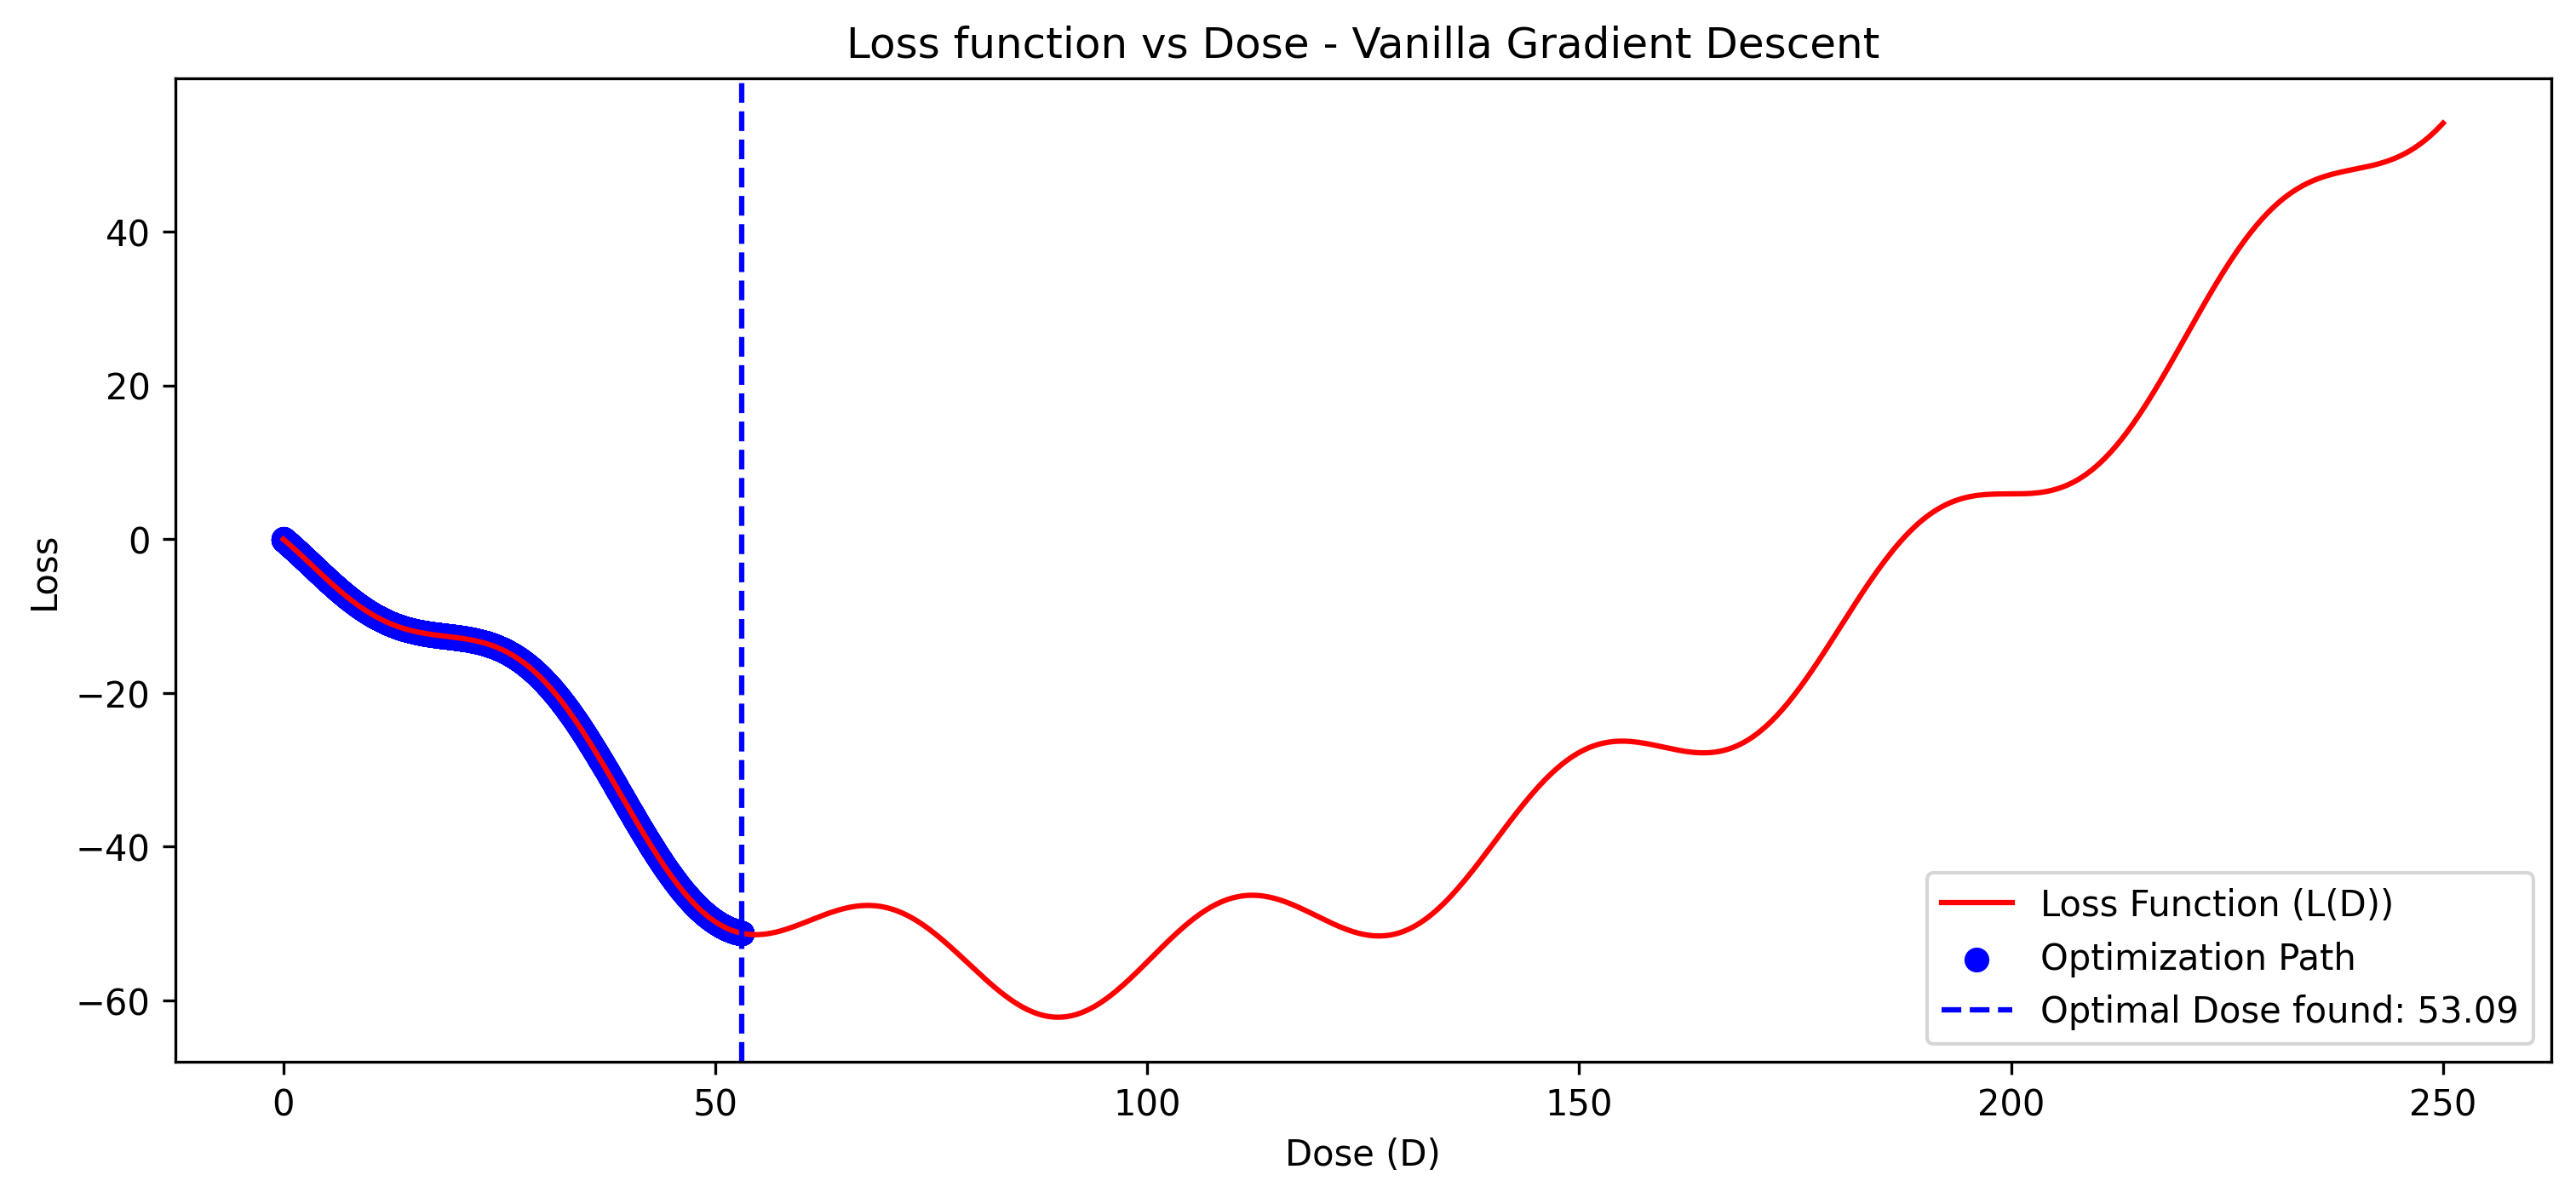

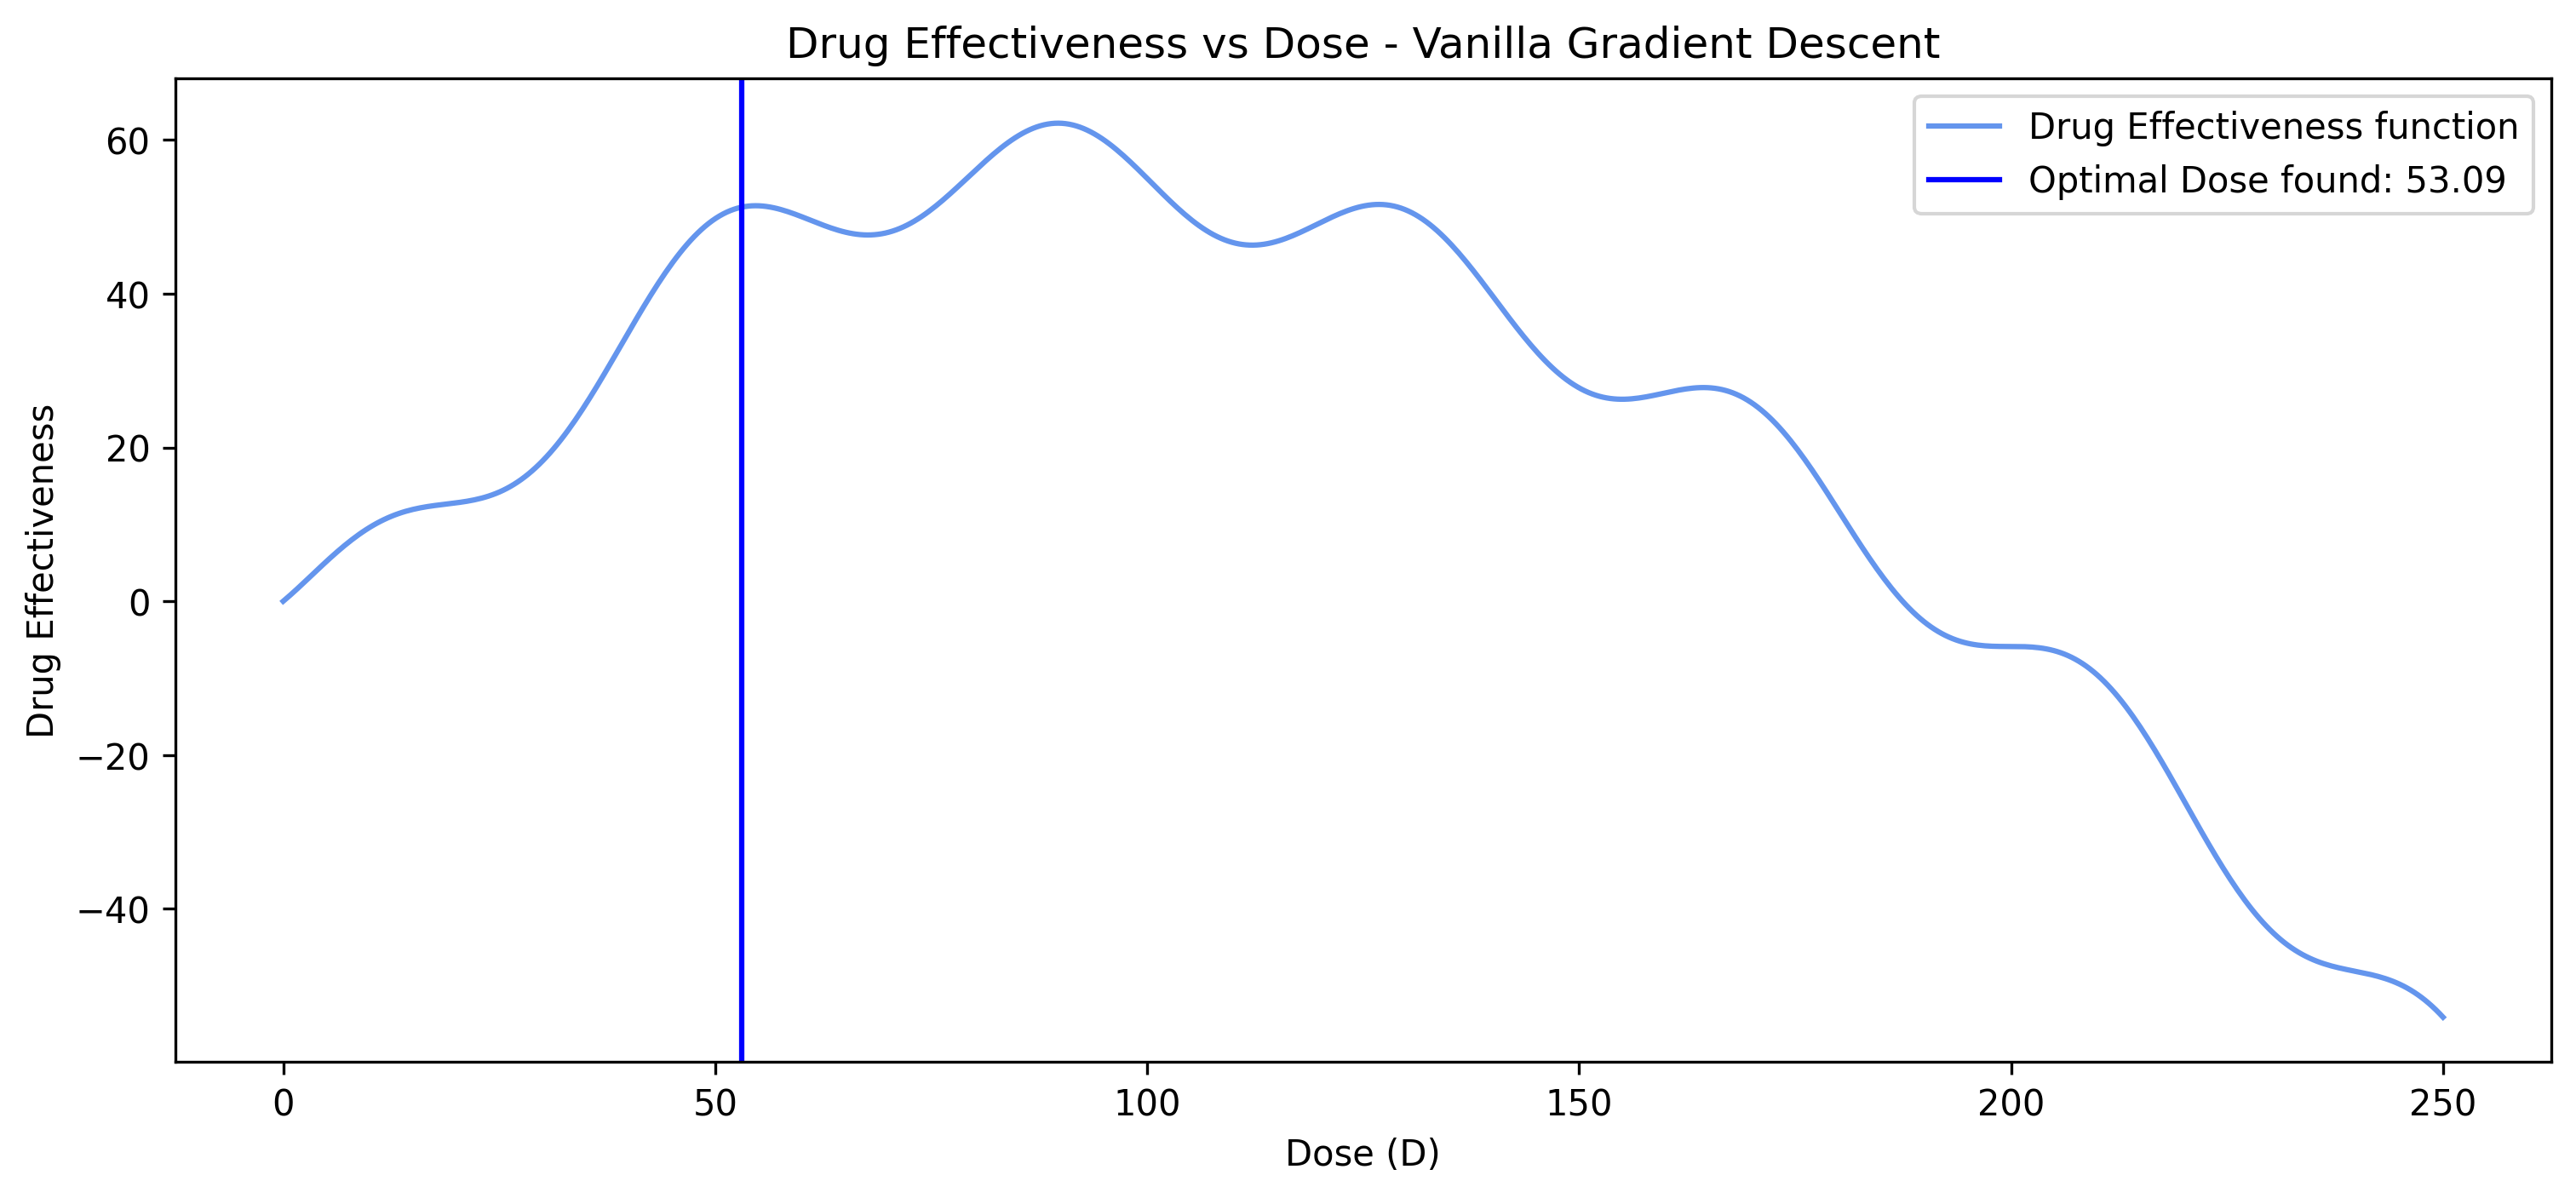

In [4]:
#Gradient Descent

D = 0
learning_rate = 0.01
epochs = 10000

losses_gd = []
d_history_gd = []

for _ in range(epochs):

    d_history_gd.append(D)
    losses_gd.append(loss_function(D))

    D -= learning_rate * loss_function_gradient(D)

plot_results(all_Ds,all_Es,all_Ls,epochs,None,d_history_gd,None,D,'Vanilla Gradient Descent')


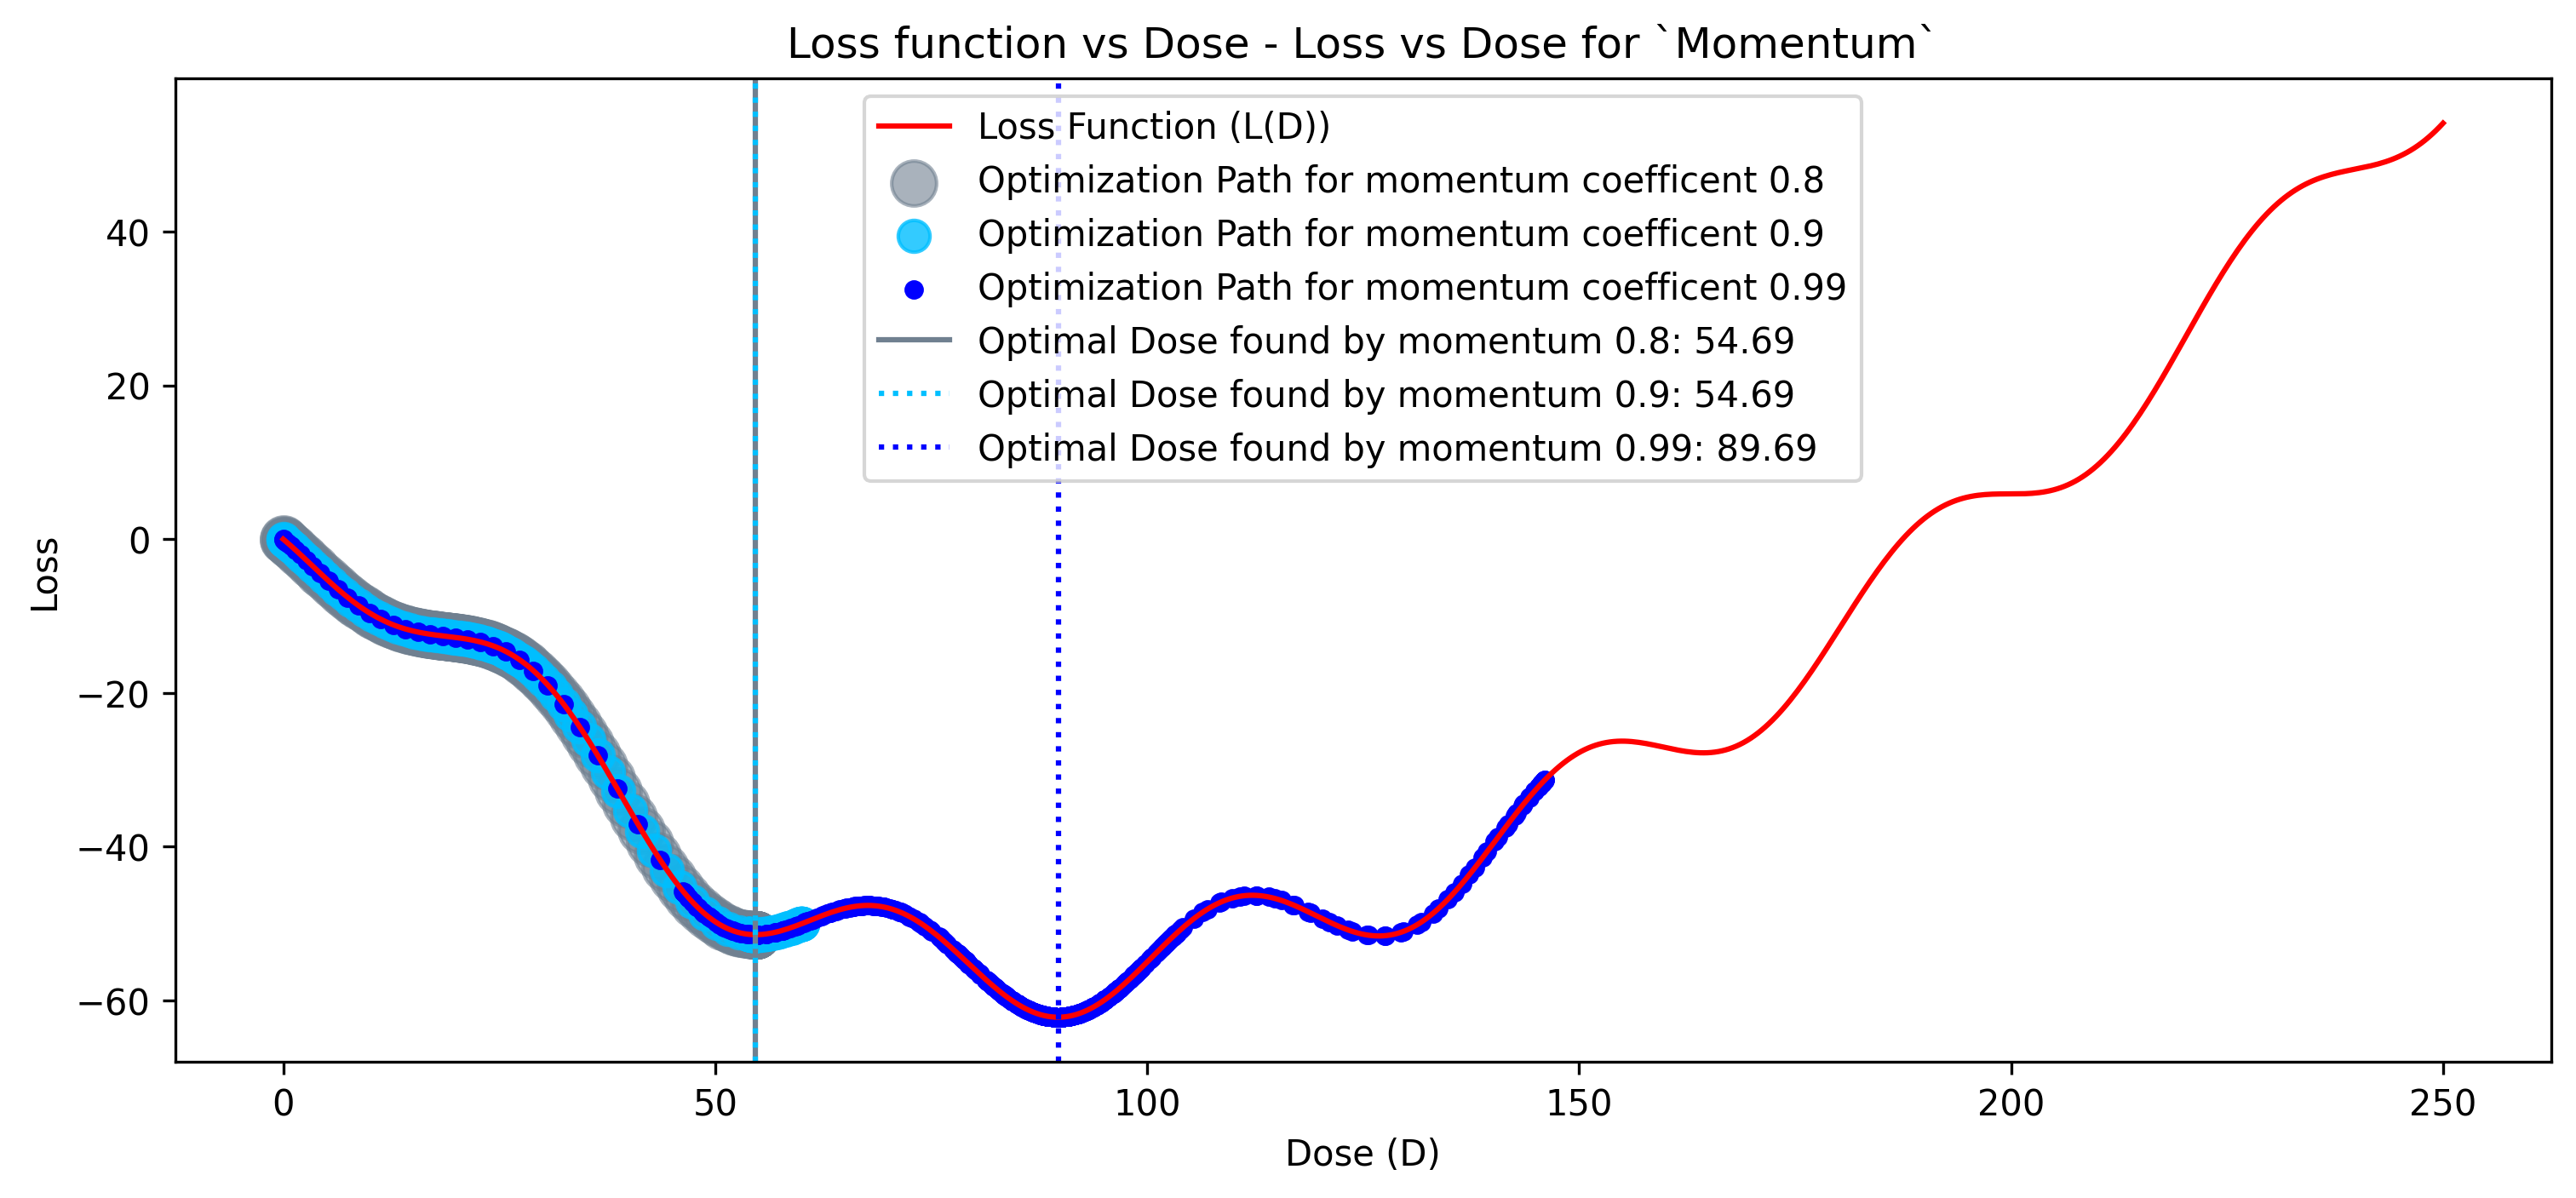

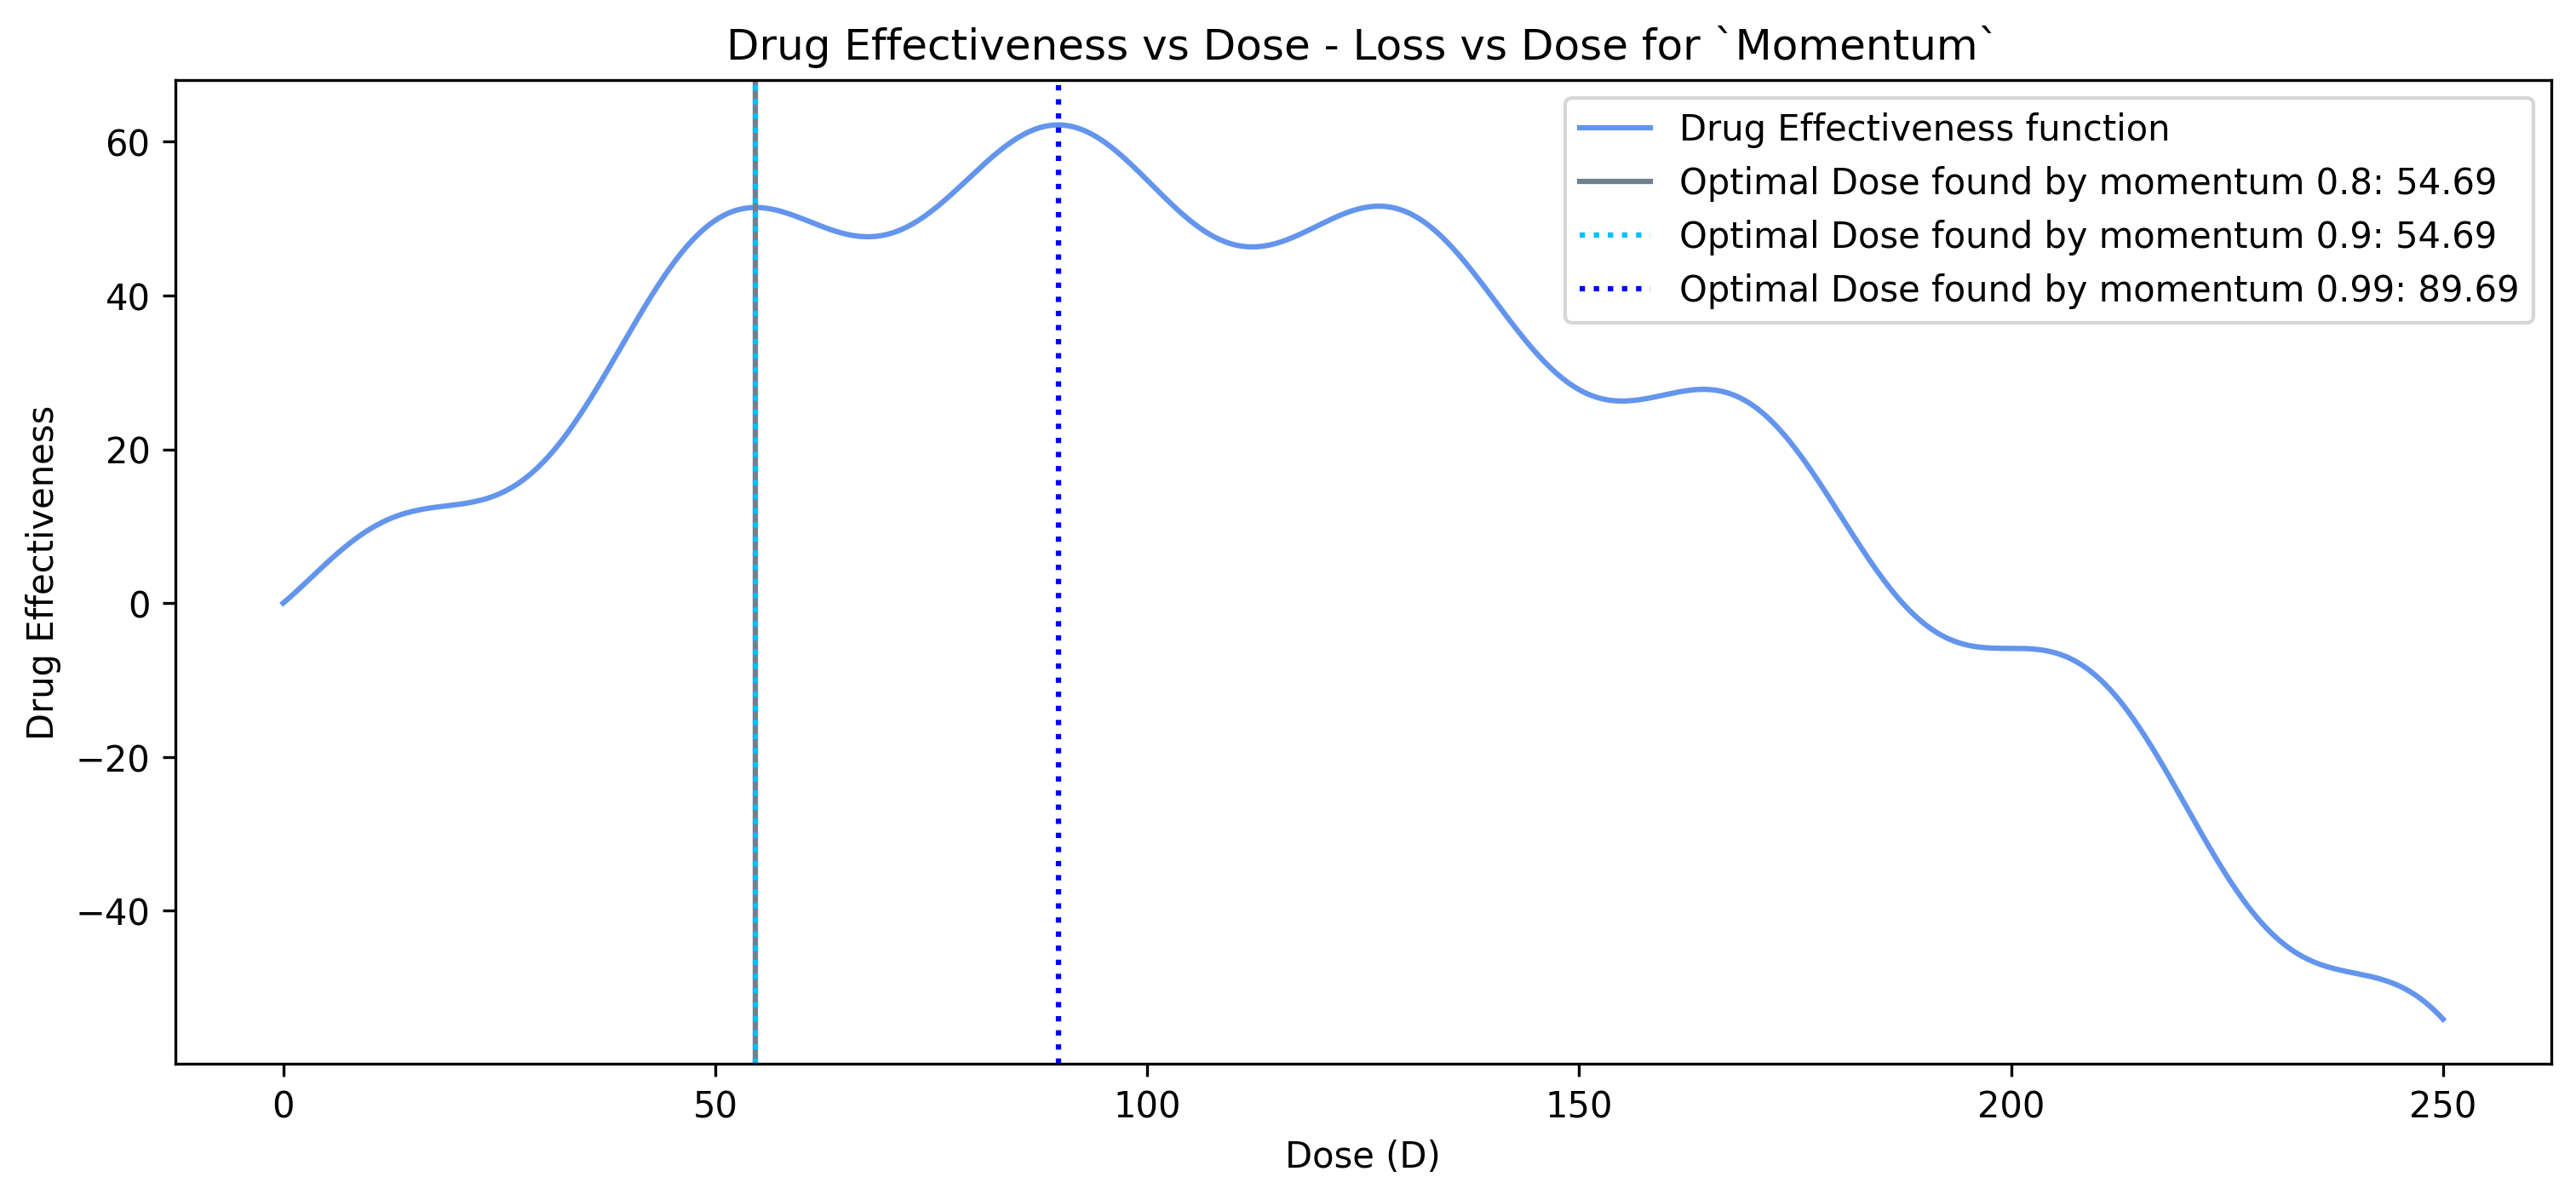

In [5]:
# Gradient Descent with Momentum

learning_rate = 0.1
epochs = 100000
momentum_coefficients = [0.8, 0.9, 0.99]

losses_with_momentum = []
d_history_momentum = []
optimal_Ds_momentum = []

for momentum_coefficient in momentum_coefficients:
    D = 0
    v = 0

    for _ in range(epochs):
        d_history_momentum.append(D)
        losses_with_momentum.append(loss_function(D))

        v = momentum_coefficient * v + learning_rate * loss_function_gradient(D)
        D -= v

    optimal_Ds_momentum.append(D)

plot_results(all_Ds,all_Es,all_Ls,epochs,momentum_coefficients,d_history_momentum,optimal_Ds_momentum,D,'Loss vs Dose for `Momentum`')



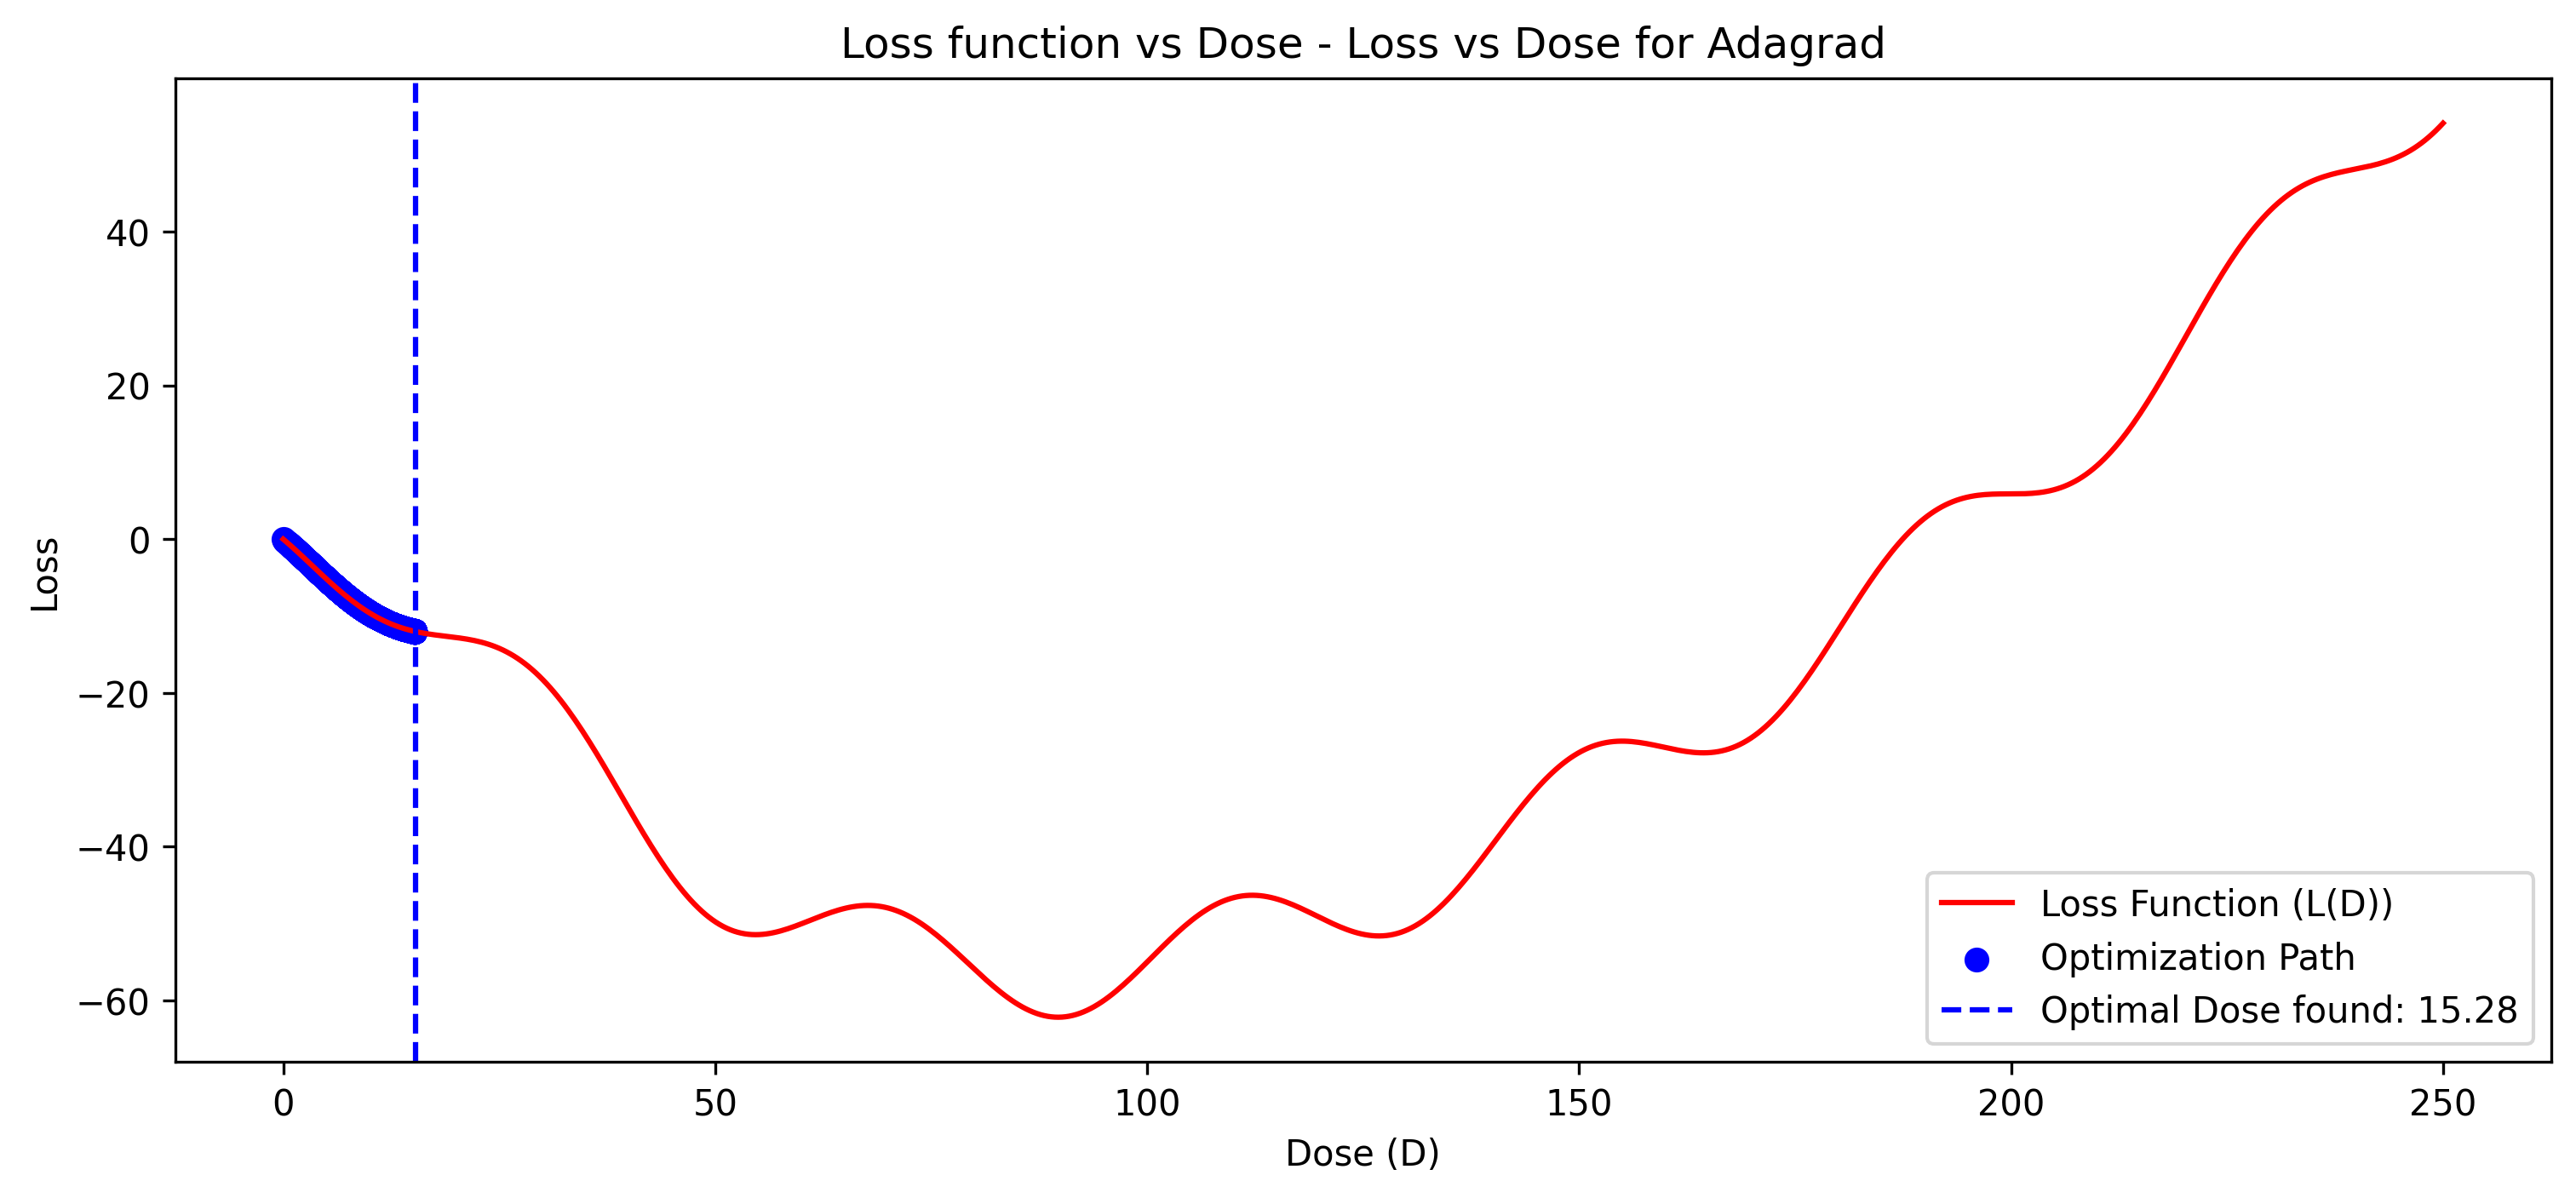

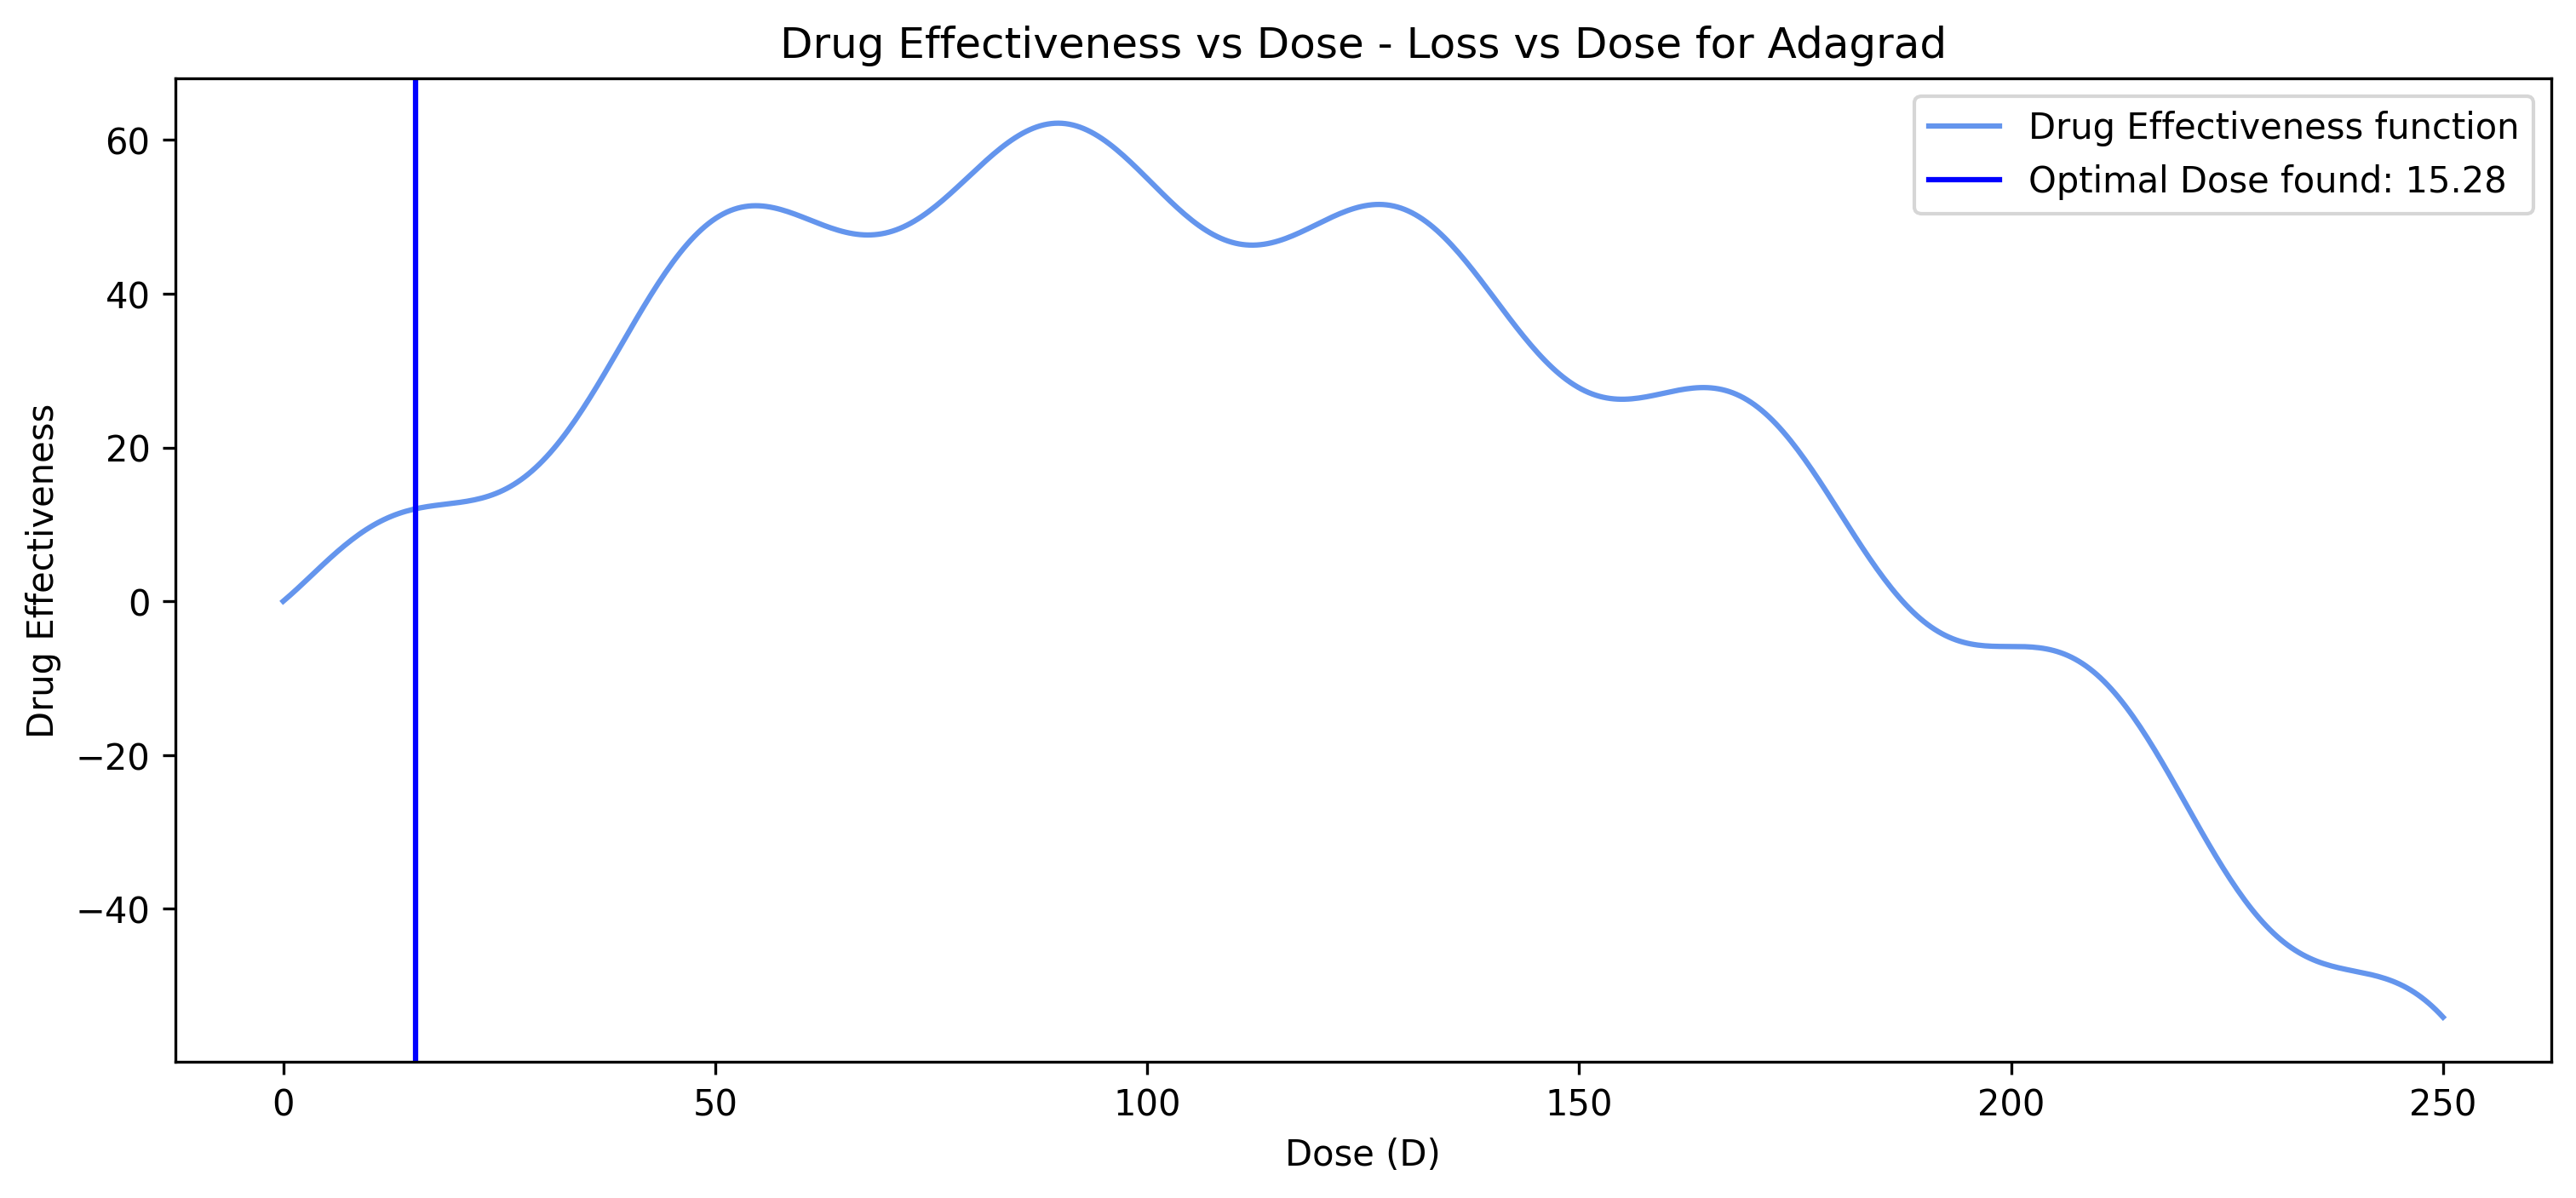

In [6]:
# Gradient Descent with Adagrad

D = 0
epsilon = 1e-8
learning_rate = 0.1
epochs = 10000

g_accumulated = 0

losses_with_adagrad = []
d_history_adagrad = []

for _ in range(epochs):
    d_history_adagrad.append(D)
    losses_with_adagrad.append(loss_function(D))

    g_accumulated += loss_function_gradient(D)**2
    effective_learning_rate = learning_rate / (np.sqrt(g_accumulated) + epsilon)

    D -= effective_learning_rate * loss_function_gradient(D)


plot_results(all_Ds,all_Es,all_Ls,epochs,None,d_history_adagrad,None,D,'Loss vs Dose for Adagrad')

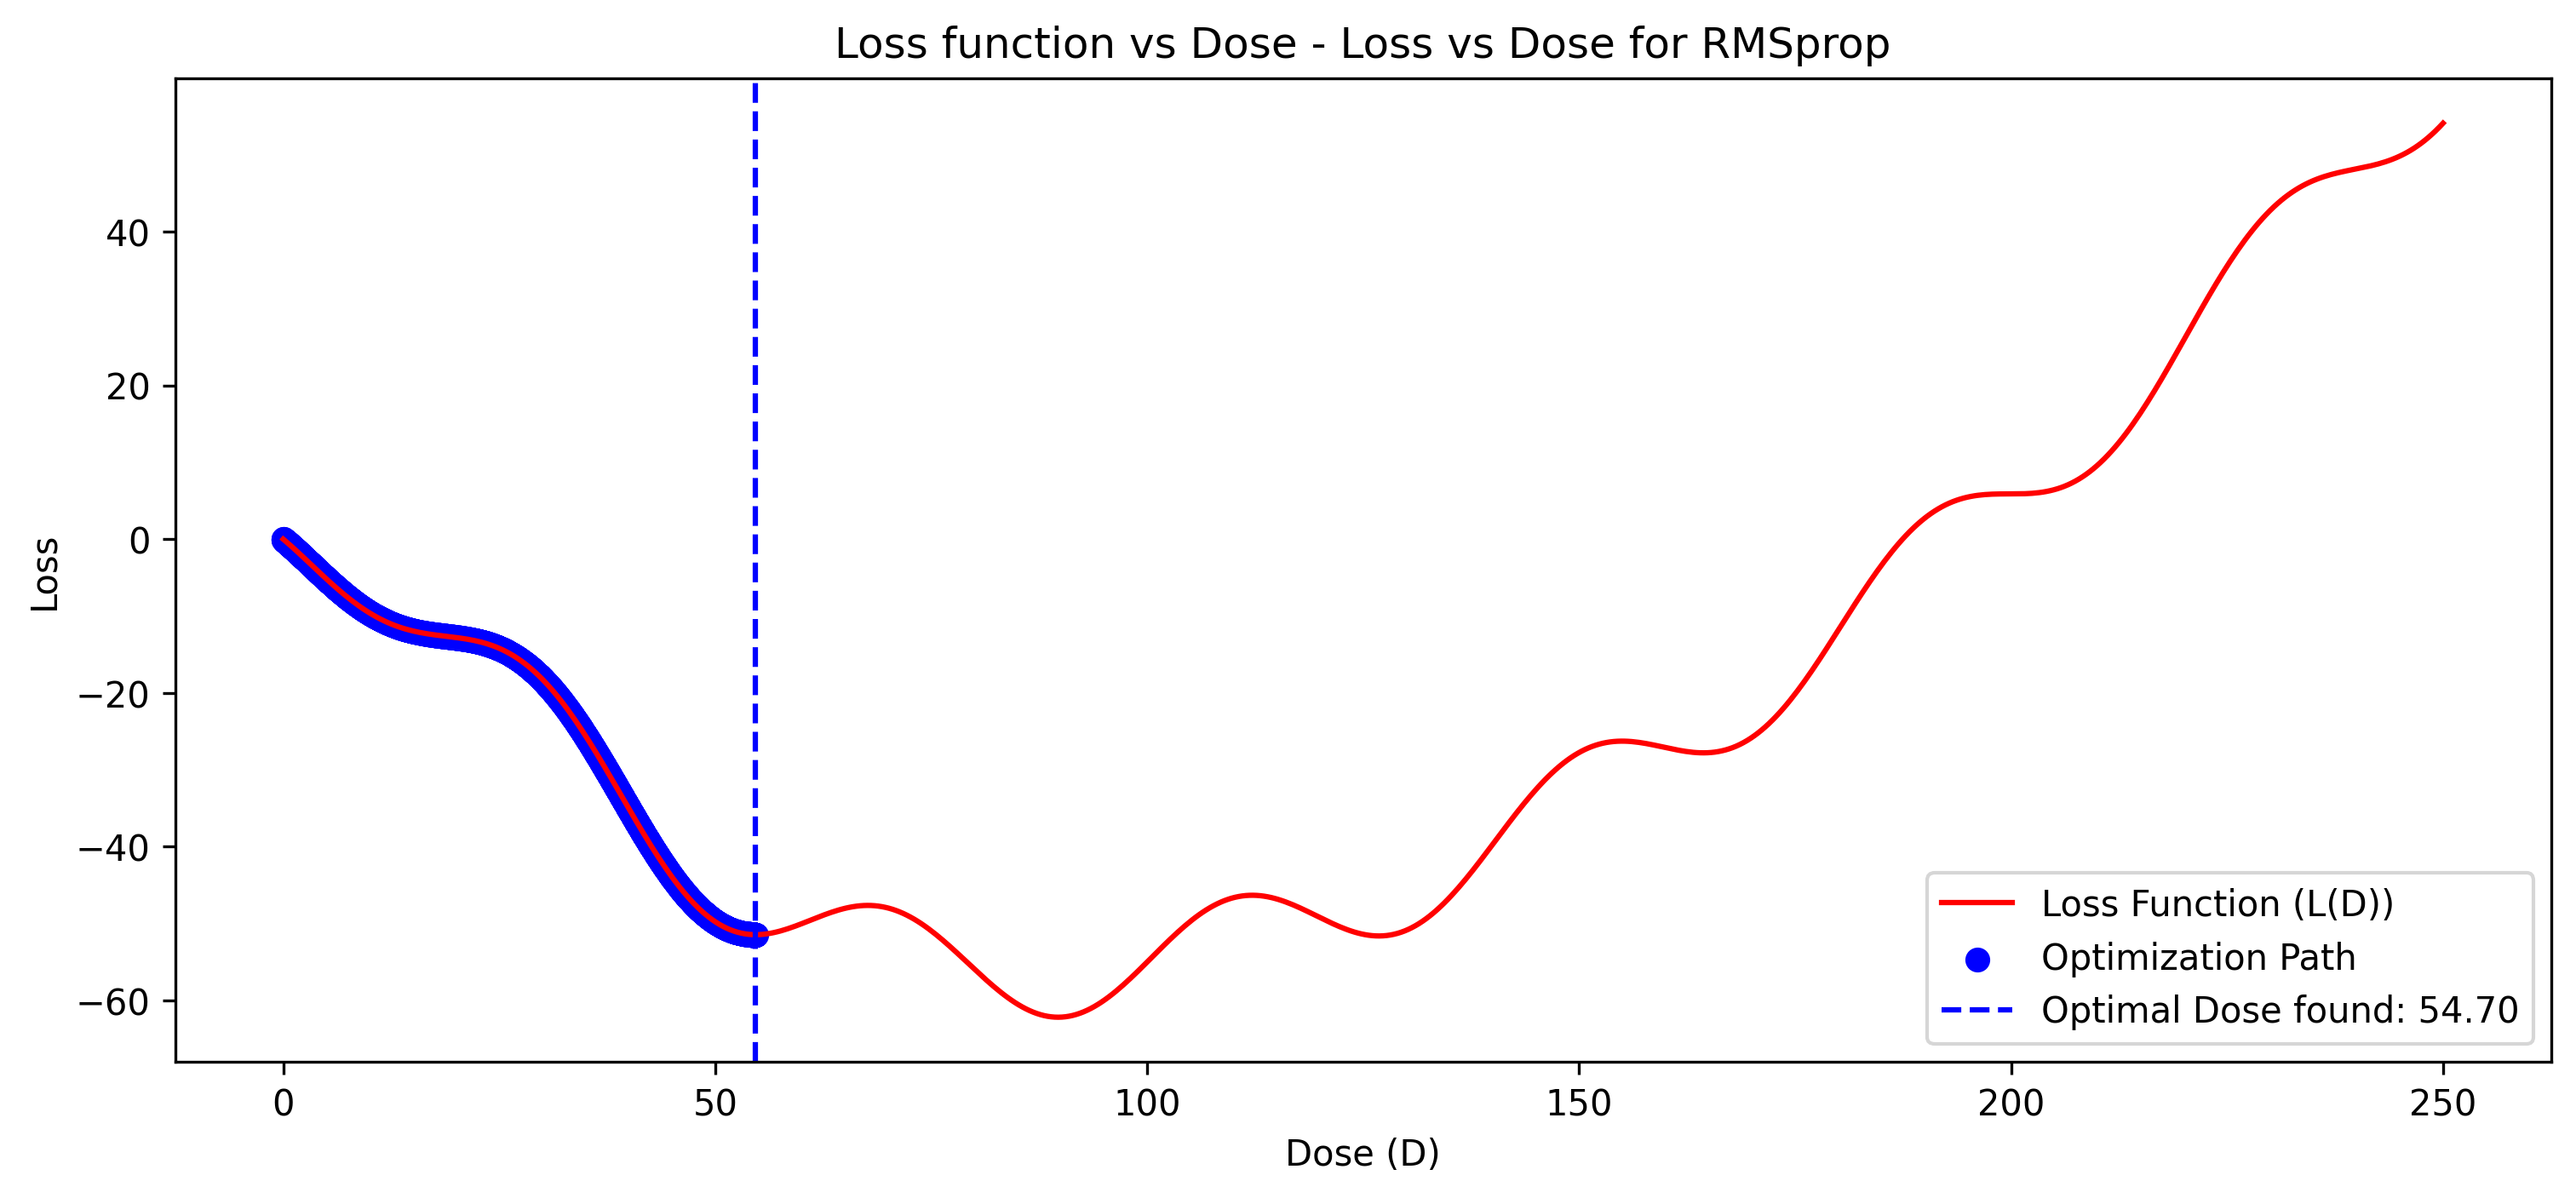

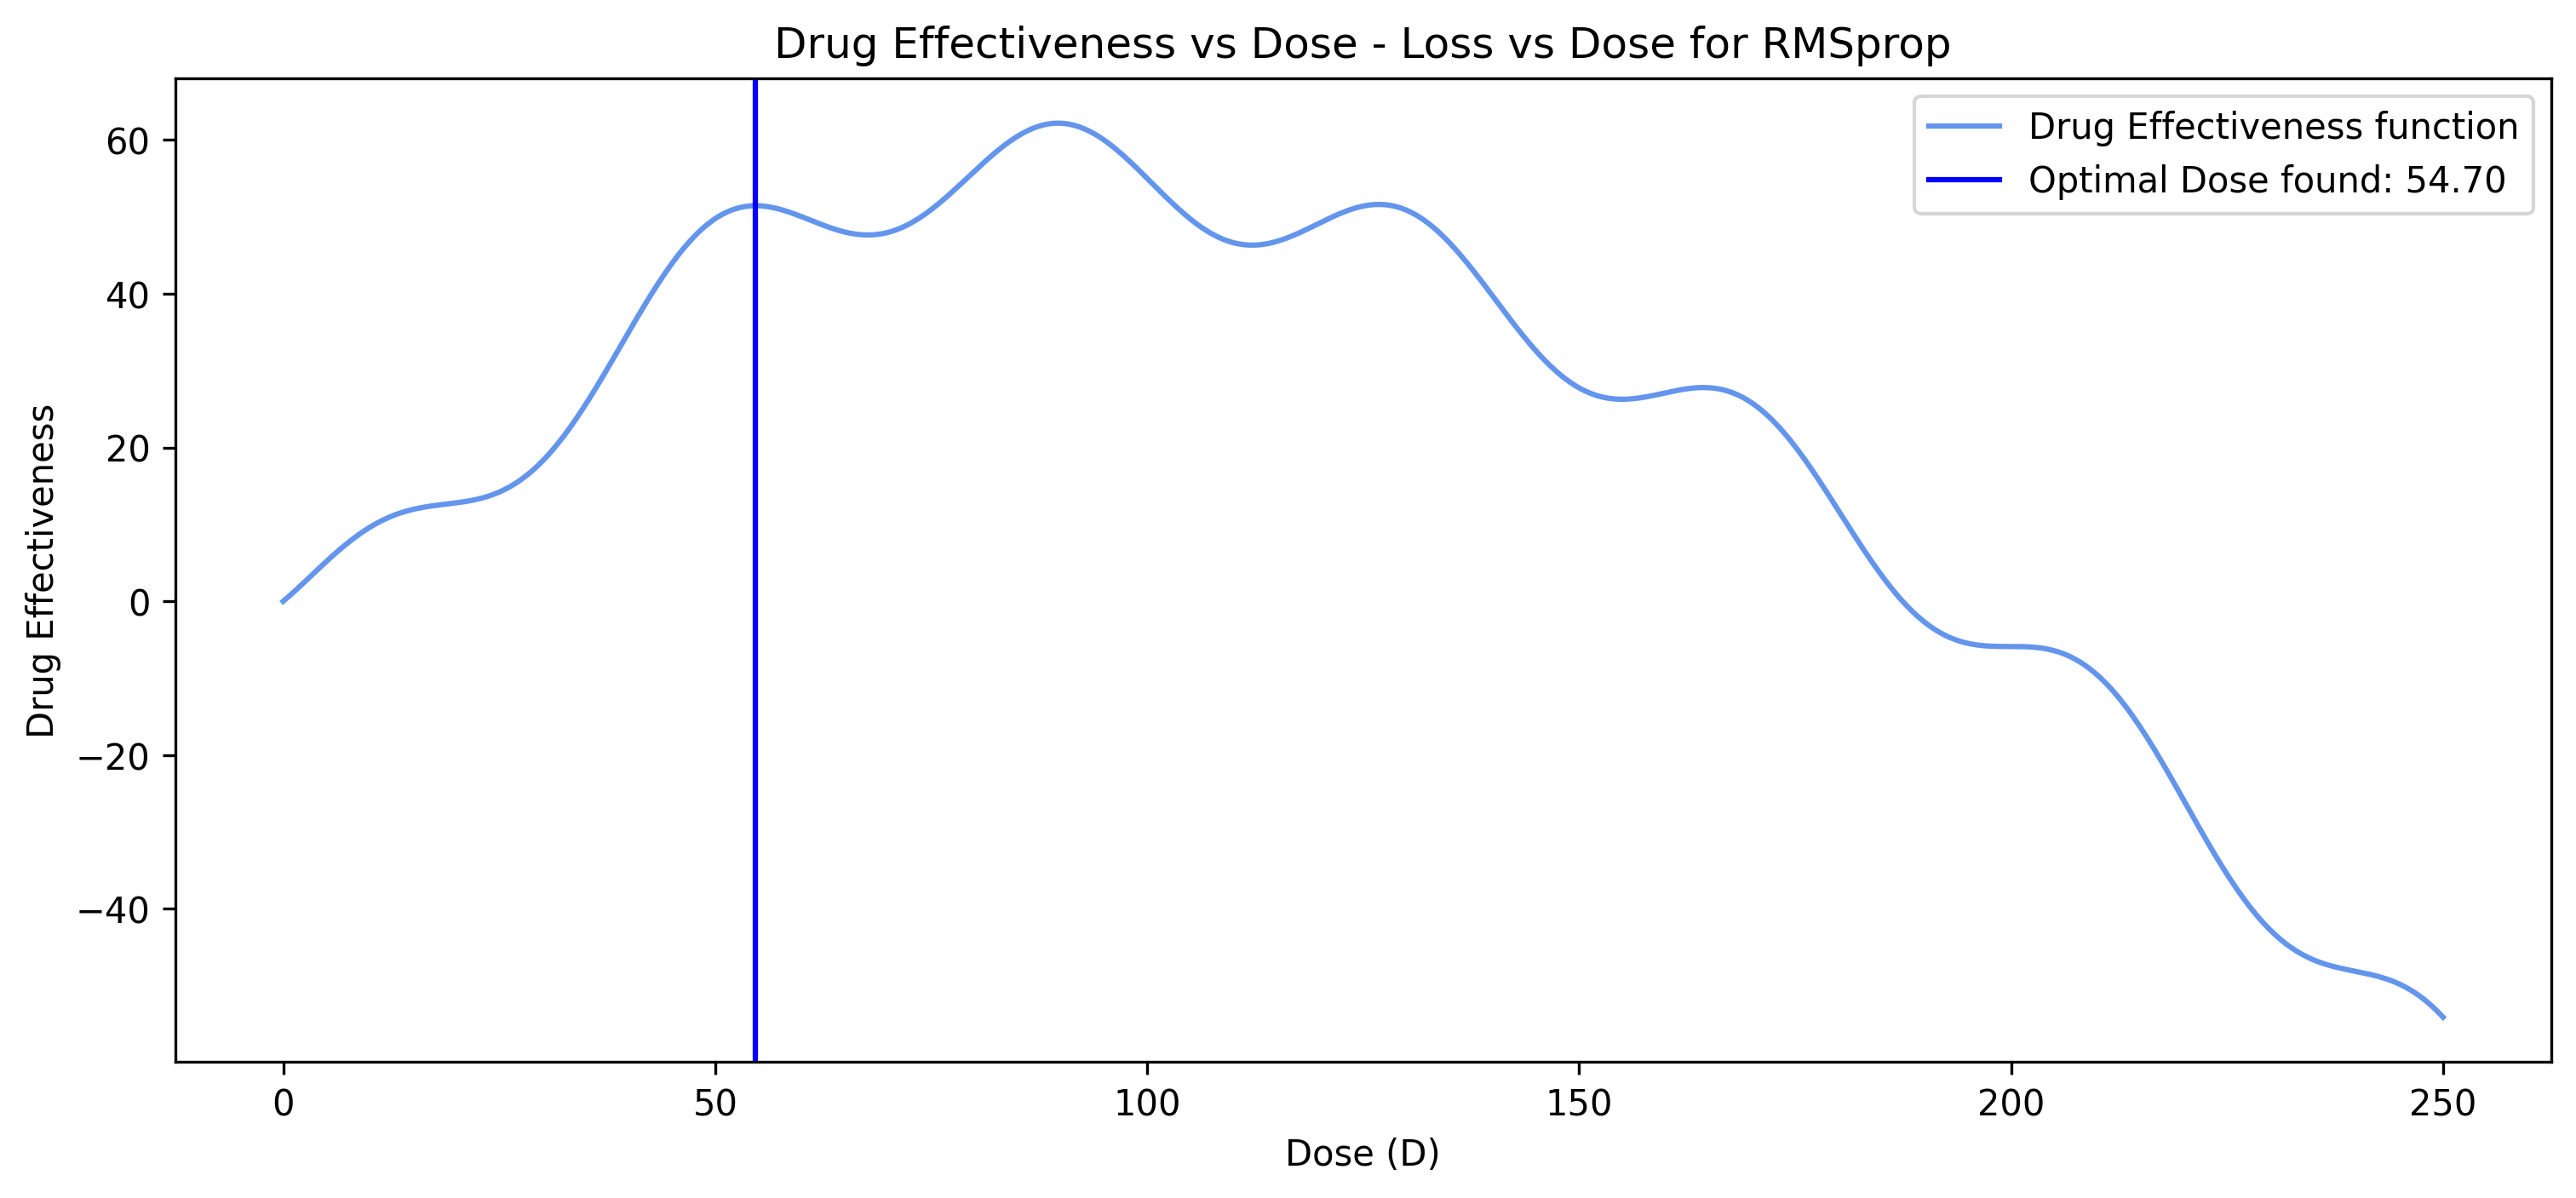

In [7]:
# Gradient Descent with RMSprop

D = 0
epsilon = 1e-8
learning_rate = 0.01
epochs = 10000
rms_prop_coefficient = 0.90
sqgr = 0

losses_with_RMS_prop = []
d_history_RMS_prop = []

for _ in range(epochs):
    d_history_RMS_prop.append(D)
    losses_with_RMS_prop.append(loss_function(D))

    sqgr = rms_prop_coefficient * sqgr + (1 - rms_prop_coefficient) * loss_function_gradient(D)**2
    effective_learning_rate = learning_rate / (np.sqrt(sqgr) + epsilon)

    D -= effective_learning_rate * loss_function_gradient(D)

plot_results(all_Ds,all_Es,all_Ls,epochs,None,d_history_RMS_prop,None,D,'Loss vs Dose for RMSprop')


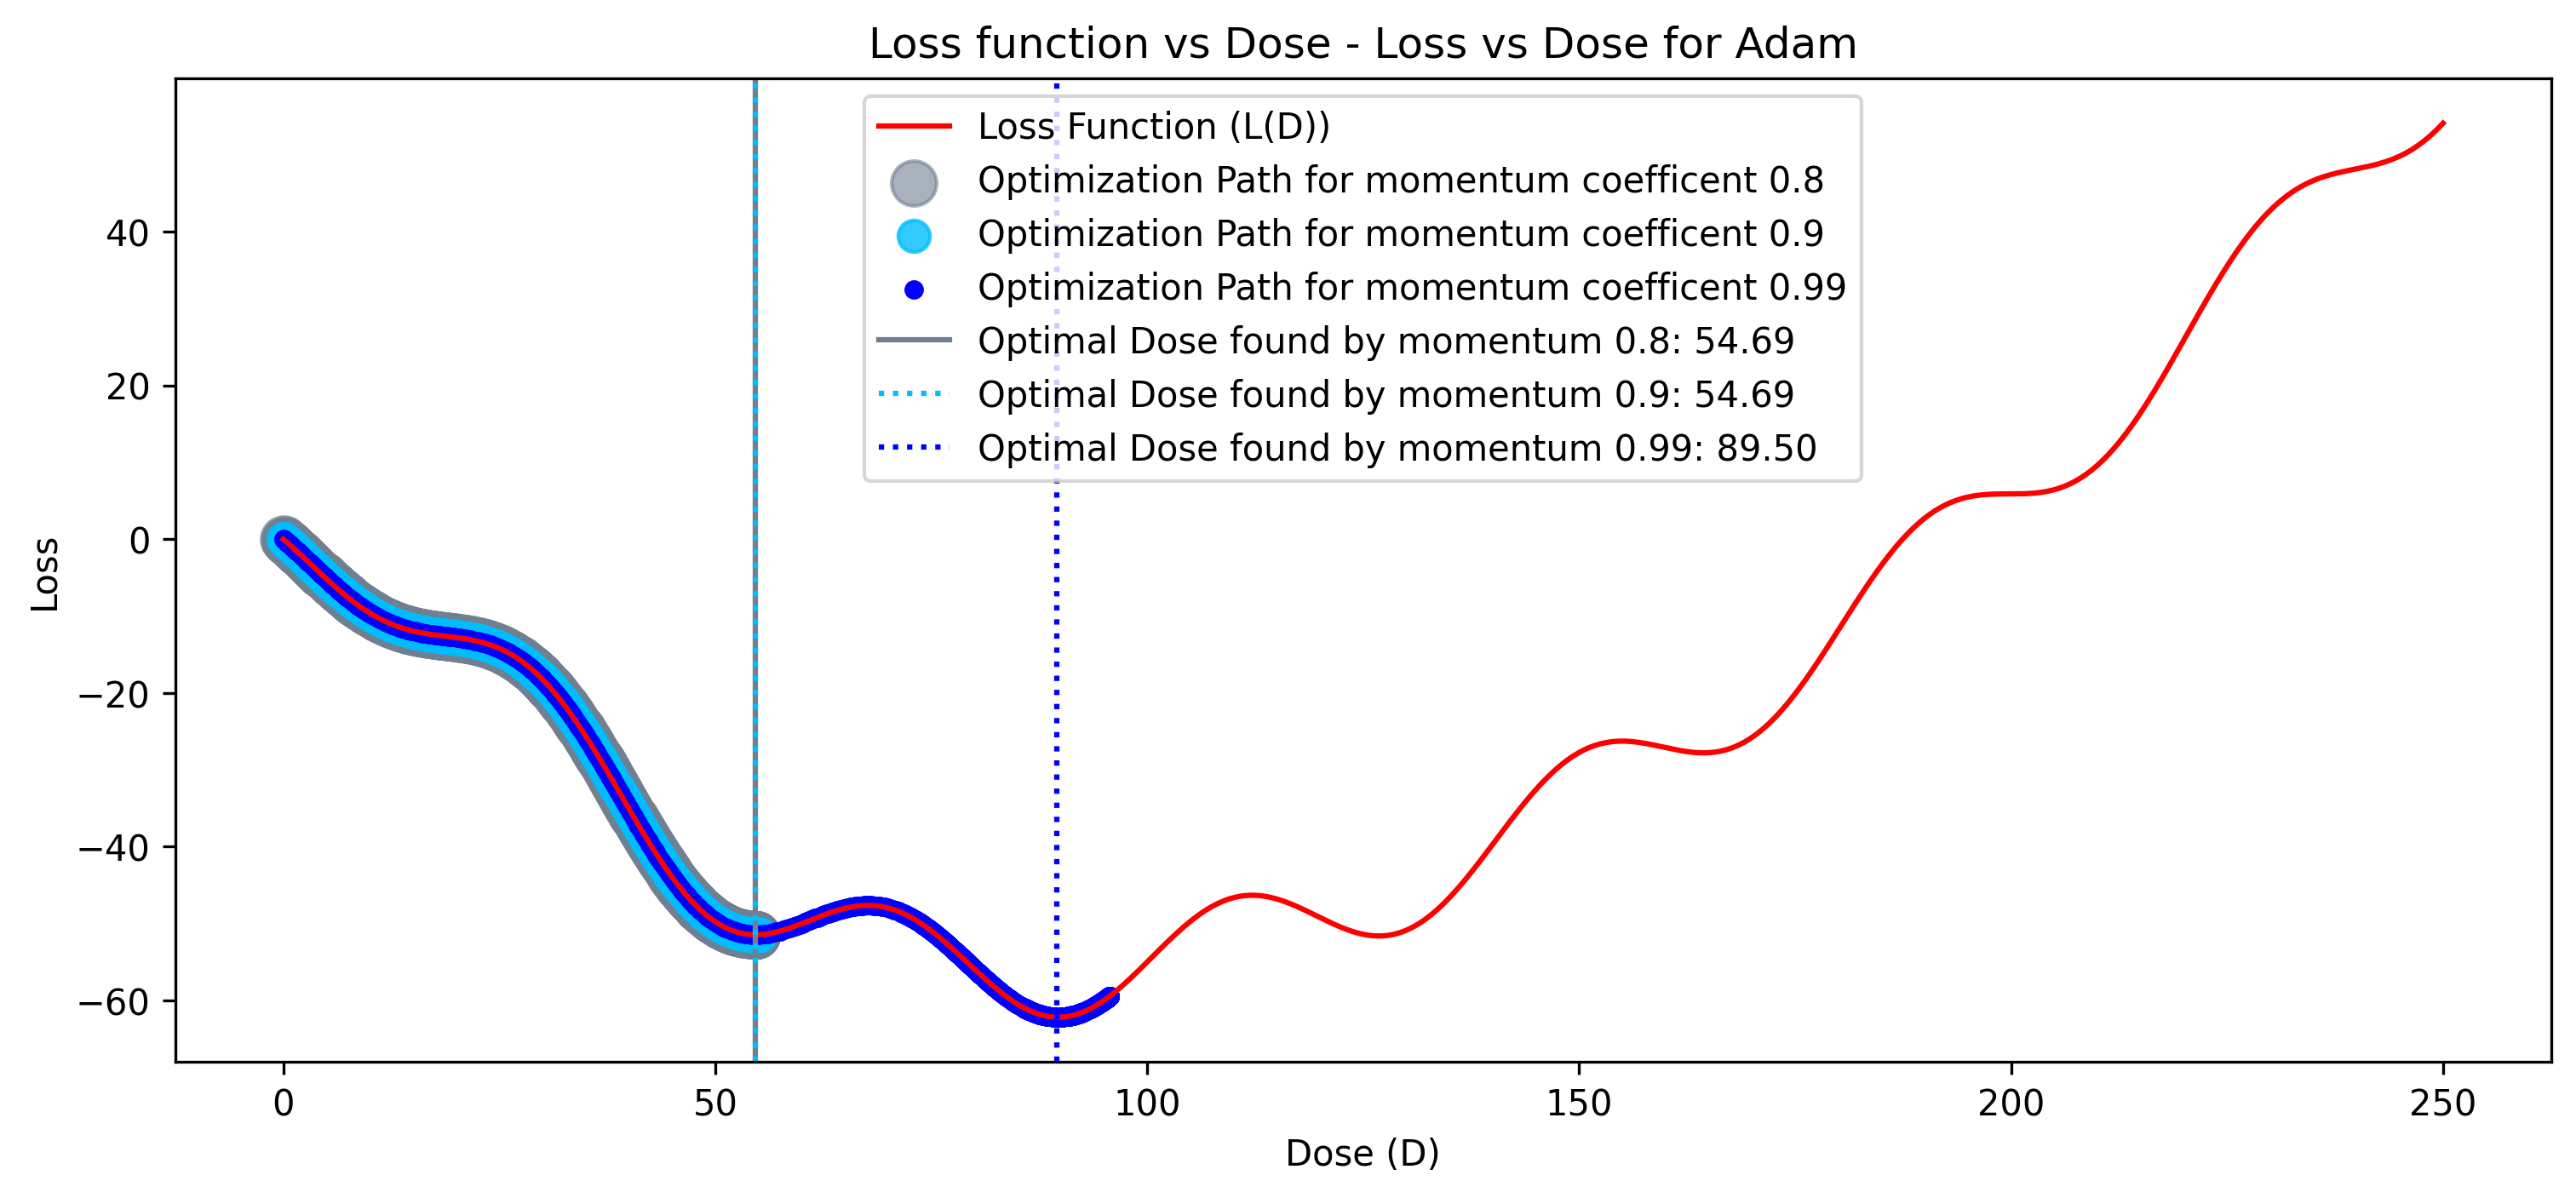

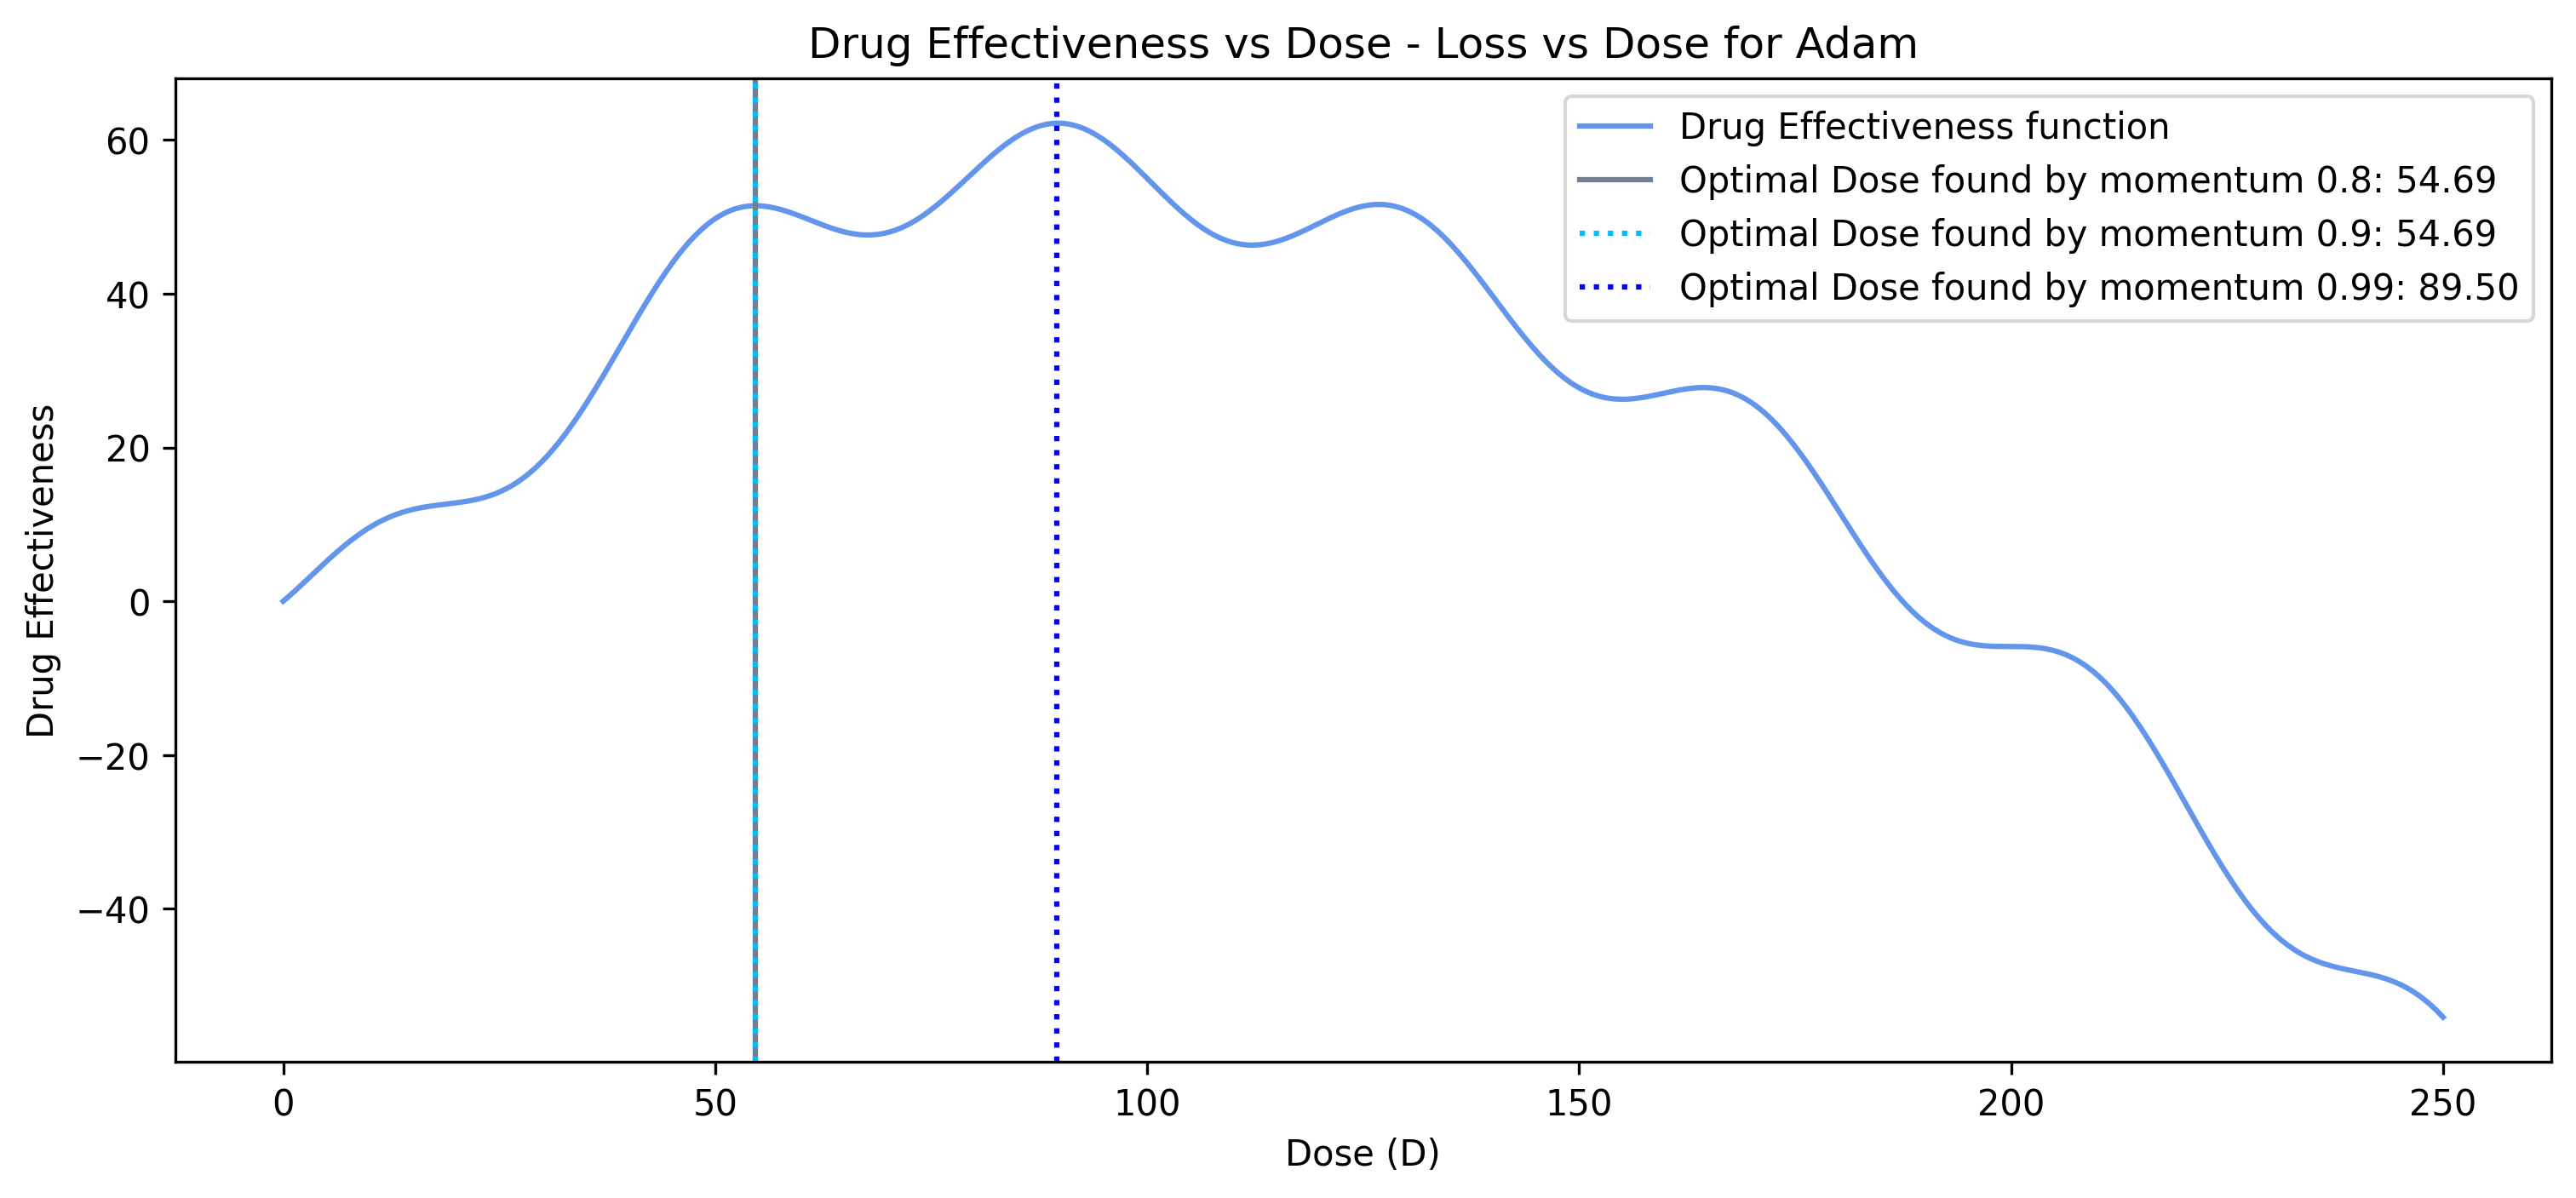

In [8]:
# Gradient Descent with ADAM

epsilon = 1e-8
learning_rate = 0.1
epochs = 100000
rms_prop_coefficient = 0.9
momentum_coefficients = [0.8, 0.9, 0.99]

losses_with_adam = []
d_history_adam = []
optimal_Ds_adam = []

for momentum_coefficient in momentum_coefficients:
    D = 0
    m = 0
    v = 0

    for epoch in range(epochs):
        d_history_adam.append(D)
        losses_with_adam.append(loss_function(D))

        gradient = loss_function_gradient(D)
        m = momentum_coefficient * m + (1 - momentum_coefficient) * gradient
        v = rms_prop_coefficient * v + (1 - rms_prop_coefficient) * gradient**2

        m_corrected = m / (1 - momentum_coefficient**(epoch + 1))
        v_corrected = v / (1 - rms_prop_coefficient**(epoch + 1))

        effective_learning_rate = learning_rate / (np.sqrt(v_corrected) + epsilon)
        D -= effective_learning_rate * m_corrected

    optimal_Ds_adam.append(D)

plot_results(all_Ds,all_Es,all_Ls,epochs,momentum_coefficients,d_history_adam,optimal_Ds_adam,None,'Loss vs Dose for Adam')

